result:


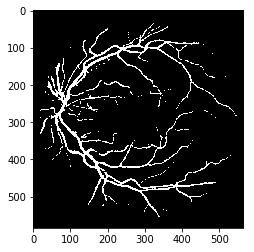

blood_vessel_segmentation_masks:


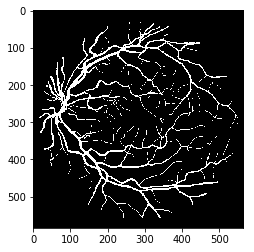

------------------------
JSC = 0.636545998827269


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# get image path
image_path = "../Data_Group_Component_Task_2/Test/original_retinal_images/"
mask_path = "../Data_Group_Component_Task_2/Test/blood_vessel_segmentation_masks/"

images = os.listdir(image_path)
masks = os.listdir(mask_path)
images.sort()
masks.sort()
img_number = 0
img_name = image_path + images[img_number]
mask_name=mask_path + masks[img_number]

img=cv2.imread(img_name)
gray1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, canny1 = cv2.threshold (gray1, 20, 255 , cv2.THRESH_BINARY)
# plt.imshow(canny1,'gray')
# plt.show()

green=img[:,:,1]
dst=255-green
clahe = cv2.createCLAHE(clipLimit=0.18,tileGridSize=(1,1))
img2=clahe.apply(dst)

kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)

final=cv2.subtract(img2,opening)
ret, binary = cv2.threshold (final ,11, 180, cv2.THRESH_BINARY)
print('result:')
binary=cv2.medianBlur(binary, 3)
plt.imshow(binary,'gray')
plt.show()

mask=Image.open(mask_name)
mask=mask.convert('RGB')
print('blood_vessel_segmentation_masks:')
plt.imshow(mask,'gray')
plt.show()

mask=mask.convert('L')
binary = np.array(binary)
mask = np.array(mask)
    
def evaluation(image, mask):
    
    zeros_list_img, one_list_img, zeros_list_mk, one_list_mk = [], [], [], []
    
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            val_mk = mask[i][j]
            val_img  = image[i][j]
            if val_mk == 0:
                zeros_list_mk.append((i,j))
            else:
                one_list_mk.append((i,j))
            if val_img == 0:
                zeros_list_img.append((i,j))
            else:
                one_list_img.append((i,j))
    #print(len(one_list_img))
    TP = len(set(one_list_img).intersection(set(one_list_mk)))
    TN = len(set(zeros_list_img).intersection(set(zeros_list_mk)))
    FP = len(set(one_list_img).intersection(set(zeros_list_mk)))
    FN = len(set(zeros_list_img).intersection(set(one_list_mk)))
    TPR = TP/(FN + TP)
    TNR = TN/(TN + FP)
    P = TP/(TP + FP)
    R = TP/(TP + FN)
    F = 2*(R*P/(R + P))
    JSC = TP/(TP + FP + FN)
    DSC = 2*(TP/(FP + 2*TP + FN))
    return TPR, TNR, F, JSC, DSC

print('------------------------')
TPR, TNR, F, JSC, DSC = evaluation(binary,mask)
print('JSC = ', end = '')
print(JSC)